## Summary of the 1.2 project on EN_dataset
### 1. a fundamental analysis of whats the composition of the article
### 2. using spacy to analyze and visualize a chunk of text as an example
### 3. using spacy to get the composition of the type of words and type of entity and visualize it.
### 4. using the SKlrean to build a business filter and using three different algorithms to analyze which has 
### the best accuracy 
### 5. sentiment analysis and visualization

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
nlp = spacy.load('en_core_web_sm')


In [3]:
df_en = pd.read_csv('ChinaDaily_EN_cleaned.csv')


In [4]:
df_en.head()

,Unnamed: 0,level_0,column_1,column_2,content,publishtime,source,title,url
0,0,0,Business,"100 cities, counties and companies",The artificial intelligence sector is expected...,2018-10-15 09:33,"QIU QUANLIN,CHINA DAILY",AI plays crucial role in industrial upgrading,http://www.chinadaily.com.cn/a/201810/15/WS5bc...
1,1,1,Business,"100 cities, counties and companies",The 124th session of China's largest trade eve...,2018-10-15 09:21,"QIU QUANLIN IN GUANGZHOU,CHINA DAILY",Guangzhou cements position as key trading hub,http://www.chinadaily.com.cn/a/201810/15/WS5bc...
2,2,2,Business,"100 cities, counties and companies","Sixteen years ago, leaving his home village of...",2018-10-16 09:33,"LI LEI, SHI BAOYIN AND QI XIN IN LANKAO, HENA...",Returning workers succeed at home,http://www.chinadaily.com.cn/a/201810/16/WS5bc...
3,3,3,Business,"100 cities, counties and companies","Pudong - literally ""east of Huangpu River"" - i...",2018-10-17 09:16,"WANG YING AND SHI JING IN SHANGHAI,CHINA DAILY",How Pudong rose from the shadows,http://www.chinadaily.com.cn/a/201810/17/WS5bc...
4,4,4,Business,"100 cities, counties and companies",Farmers in the Tibet autonomous region's Nying...,2018-10-19 09:35,"PALDEN NYIMA IN MANLING, TIBET,CHINA DAILY",Herbs grow Tibetan farmers' fortunes,http://www.chinadaily.com.cn/a/201810/19/WS5bc...


In [5]:
# a quick conunt on different categories

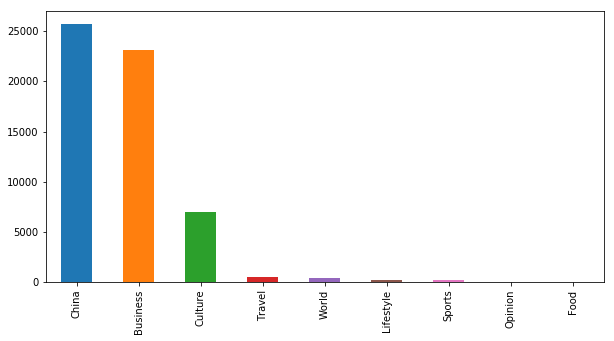

In [6]:
graph = df_en['column_1'].value_counts()
plt.figure(figsize = (10,5))
graph.plot.bar()

### using spacy to analyze a chunck of string from the 'title' column

In [7]:
# find the one have the longest title as an example string
maxlen = 0
for i in range(len(df_en)):
    
    if maxlen <= len(df_en['title'][i]):
        maxlen = len(df_en['title'][i])
        maxpos = i
print(maxlen,maxpos)


203 56410


In [8]:
#grab the longest title as first example strting
example_str = df_en['title'].iloc[maxpos]

#grab the first article as the second string
example_str2 = df_en['content'][0]

In [9]:
doc = nlp(example_str)
for token in doc:
    print(token.text, end = " | ")
print(f"------the number of the tokens are {len(doc)}")

" | We | should | continue | to | implement | the | ' | going | out | ' | strategy | " | – | said | the | secretary | of | the | party | committee | of | the | Mount | Sanqingshan | Scenic | Area | during | a | joint | interview | by | both | foreign | and | domestic | reporters | ------the number of the tokens are 37


In [10]:
for entity in doc.ents:
    print(entity)
    print(entity.label_)
    print(str(spacy.explain(entity.label_)))

the Mount Sanqingshan Scenic Area
FAC
Buildings, airports, highways, bridges, etc.


In [11]:
from spacy import displacy

In [12]:
displacy.render(doc,style = "dep", jupyter = True, options = {'distance':80})

In [13]:
doc2 = nlp(example_str2)
displacy.render(doc2,style = "ent", jupyter = True)

### Stemming and Lemmatization

In [13]:
# stemming the to reduce down the words to root words
#here is a example
import nltk
from nltk.stem.porter import PorterStemmer


In [14]:
p_stemmer = PorterStemmer()


In [15]:
lst = example_str.split()

In [16]:
for item in lst:
    print(item + "----->" + p_stemmer.stem(item))

"We----->"we
should----->should
continue----->continu
to----->to
implement----->implement
the----->the
'going----->'go
out'----->out'
strategy"----->strategy"
–----->–
said----->said
the----->the
secretary----->secretari
of----->of
the----->the
party----->parti
committee----->committe
of----->of
the----->the
Mount----->mount
Sanqingshan----->sanqingshan
Scenic----->scenic
Area----->area
during----->dure
a----->a
joint----->joint
interview----->interview
by----->by
both----->both
foreign----->foreign
and----->and
domestic----->domest
reporters----->report


In [17]:
# using Lemmatization for the text reduce. which spacy have, and it is a more formal way
for token in doc:
    print(token.text,'---->',token.lemma_)

" ----> "
We ----> -PRON-
should ----> should
continue ----> continue
to ----> to
implement ----> implement
the ----> the
' ----> '
going ----> go
out ----> out
' ----> '
strategy ----> strategy
" ----> "
– ----> –
said ----> say
the ----> the
secretary ----> secretary
of ----> of
the ----> the
party ----> party
committee ----> committee
of ----> of
the ----> the
Mount ----> Mount
Sanqingshan ----> Sanqingshan
Scenic ----> Scenic
Area ----> Area
during ----> during
a ----> a
joint ----> joint
interview ----> interview
by ----> by
both ----> both
foreign ----> foreign
and ----> and
domestic ----> domestic
reporters ----> reporter


### for the analystics purpose, randomly select 100 rows from pandas dataframe
### join all the content

In [18]:

#lst_tokennum = []
#for i in range(len(df_en)):
    
    #lst_tokennum.append(len(nlp(df_en['content'][i])))

#df_en['token_numbers'] = len(nlp(df_en['content'].tolist()))
df_sample = df_en.sample(100)


In [19]:
df_sample.head()

,Unnamed: 0,level_0,column_1,column_2,content,publishtime,source,title,url
43240,43259,43259,China,Society,"As soon as Su Xiaoqian got home, she cranked u...",2018-12-27 09:13,"WANG XIAOYU,CHINA DAILY",Heating gadgets keep people warm in deep-freeze,http://www.chinadaily.com.cn/a/201812/27/WS5c2...
48332,48354,48354,China,Video,A chef has added a dash of romantic flavor to ...,2019-04-29 16:41,"SUN RUISHENG AND ZHANG YU,CHINADAILY.COM.CN",Shanxi noodles a cut above the rest,http://www.chinadaily.com.cn/a/201904/29/WS5cc...
50458,50486,50486,Culture,Books,"SHANGHAI－ trilogy, a popular Chinese science-...",2018-01-05 08:08,XINHUA,Sci-fi saga published in more than 10 languages,http://www.chinadaily.com.cn/a/201801/05/WS5a4...
26986,26995,26995,China,HK Macao Taiwan,Hong Kong Chief Executive Carrie Lam Cheng Yue...,2019-06-12 09:18,"LI BINGCUN AND HE SHUSI,CHINA DAILY",HK chief warns of radicalism's danger,http://www.chinadaily.com.cn/a/201906/12/WS5d0...
37871,37890,37890,China,Society,Recently more than 30 city planners and expe...,2017-11-24 22:24,CHINADAILY.COM.CN,Global city planners compare notes in Guangzhou,http://www.chinadaily.com.cn/a/201711/24/WS5a2...


In [20]:
lst = df_sample['content'].tolist()

In [21]:
content = " ".join(lst)

In [22]:
doc = nlp(content)

In [23]:
POS_counts = doc.count_by(spacy.attrs.POS)

for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

84. ADJ  : 2996
85. ADP  : 4634
86. ADV  : 1156
87. AUX  : 8
89. CCONJ: 1179
90. DET  : 3860
91. INTJ : 3
92. NOUN : 8214
93. NUM  : 1158
94. PART : 856
95. PRON : 669
96. PROPN: 4314
97. PUNCT: 4814
99. SYM  : 75
100. VERB : 5124
101. X    : 16
103. SPACE: 109


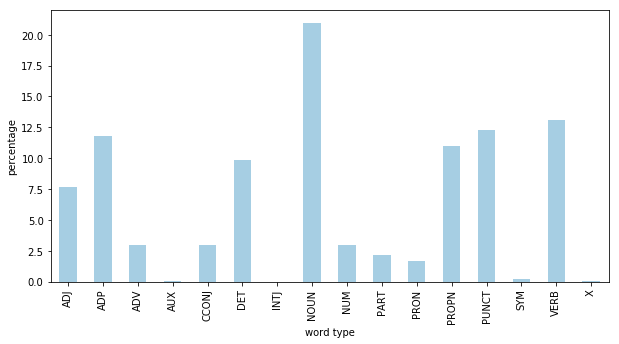

In [24]:
#get the percentage of different type words in the sample dataset
dict = {}
for i in range(83,103):
    try:
        dict[str(doc.vocab[i].text)] = float(100*POS_counts[i]/len(doc))
    except:
        continue



#pd.DataFrame(dict,index = ["word_percentage"]).plot.bar(colormap='Paired')
s = pd.Series(dict, name='word percentage')
s.index.name = 'word type'
s.reset_index()
plt.figure(figsize=(10,5))
plt.ylabel("percentage")
plt.xlabel("word type")
s.plot.bar(colormap='Paired')
#get the percentage of each representated words, there are more NOUN words in ChinaDaily article which is above 20%

In [25]:
POS_counts = doc.count_by(spacy.attrs.ENT_TYPE)

for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

380. PERSON: 868
381. NORP : 219
383. ORG  : 1746
384. GPE  : 1088
385. LOC  : 183
386. PRODUCT: 30
387. EVENT: 124
388. WORK_OF_ART: 59
389. LANGUAGE: 7
390. LAW  : 29
391. DATE : 1226
392. TIME : 32
393. PERCENT: 220
394. MONEY: 247
395. QUANTITY: 102
396. ORDINAL: 114
397. CARDINAL: 569
9191306739292312949. FAC  : 154


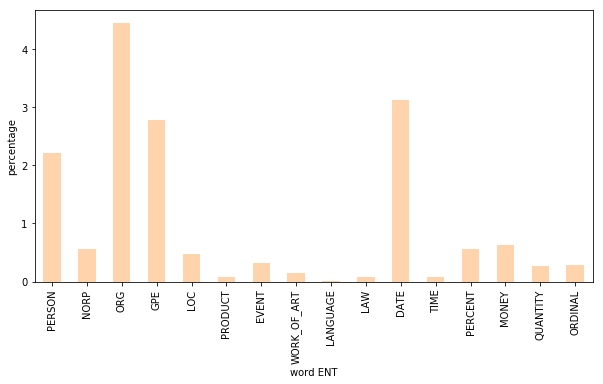

In [26]:
#get the percentage of different type words in the sample dataset
dict = {}
for i in range(379,397):
    try:
        dict[str(doc.vocab[i].text)] = float(100*POS_counts[i]/len(doc))
    except:
        continue



#pd.DataFrame(dict,index = ["word_percentage"]).plot.bar(colormap='Paired')
s = pd.Series(dict, name='ENT percentage')
s.index.name = 'word ENT'
s.reset_index()
plt.figure(figsize=(10,5))
plt.ylabel("percentage")
plt.xlabel("word ENT")
s.plot.bar(colormap='icefire_r')
#get the percentage of each representated words, there are more NOUN words in ChinaDaily article which is above 20%

In [27]:
df_sample[df_sample['column_1'] == "Business"].count()

Unnamed: 0     35
level_0        35
column_1       35
column_2       35
content        35
publishtime    35
source         35
title          35
url            35
dtype: int64

### machine learning, buidling the model using sklearn, to pend if the article is business related

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#df_sample = df_en.sample(1000)

In [29]:
def if_business(x):
    if x == 'Business':
        return 1
    else:
        return 0
df_en['if_business'] = df_en['column_1'].apply(if_business)

In [30]:
# x is feature data
X = df_en['content']
# y  is label
y = df_en['if_business']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 7)

In [31]:
X_train.shape

(40057,)

In [32]:
X_test.shape

(17168,)

In [33]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [34]:
X_train_counts = count_vect.fit_transform(X_train)

In [35]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [36]:
X_train_tfidf.shape

(40057, 102466)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
text_clf_LR = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

# Feed the training data through the pipeline
text_clf_LR.fit(X_train, y_train)  

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [43]:
predictions = text_clf_LR.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions))

[[9557  685]
 [ 851 6075]]


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10242
           1       0.90      0.88      0.89      6926

   micro avg       0.91      0.91      0.91     17168
   macro avg       0.91      0.91      0.91     17168
weighted avg       0.91      0.91      0.91     17168



In [46]:
text_clf_NB = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Feed the training data through the pipeline
text_clf_NB.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
predictions = text_clf_NB.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions))

[[9573  669]
 [1080 5846]]


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     10242
           1       0.90      0.84      0.87      6926

   micro avg       0.90      0.90      0.90     17168
   macro avg       0.90      0.89      0.89     17168
weighted avg       0.90      0.90      0.90     17168



In [50]:
text_clf_RF = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),
])

# Feed the training data through the pipeline
text_clf_RF.fit(X_train, y_train)  

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [51]:
predictions = text_clf_RF.predict(X_test)

In [52]:
print(confusion_matrix(y_test,predictions))

[[9393  849]
 [1658 5268]]


In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10242
           1       0.86      0.76      0.81      6926

   micro avg       0.85      0.85      0.85     17168
   macro avg       0.86      0.84      0.85     17168
weighted avg       0.85      0.85      0.85     17168



In [54]:
df_en['content'][6]

'Four decades ago, Shenzhen was just a small fishing village adjacent to Hong Kong. Today, the city in southern Guangdong province is the country\'s high-tech and innovation hub. It\'s known as China\'s Silicon Valley and is the headquarters of internet and telecom giants Tencent and Huawei, thanks to the country\'s reform and opening-up policy. With a population of more than 12 million, Shenzhen\'s rapid growth arose from cultivating emerging industries, including the internet, new-generation information technology, new materials, new energy and biological medicine. Beyond that, energy conservation, environmental protection and the cultural and creative industries have played a key role. Last year, the added value of emerging industries in Shenzhen amounted to about 918 billion yuan ($132 billion), increasing 13.6 percent compared with a year earlier and accounting for 40.9 percent of the city\'s GDP, according to official statistics. The bioindustry saw the most robust growth, with a

### sentiment analysis using vader from NLTK

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [65]:
def article_rating(string):
    scores = sid.polarity_scores(string)
    #setting the thresh hold in between [-0.2,0.2] to be neutral 
    if scores['compound'] <= 0.2 and scores['compound'] >= -0.2 :
        return 'Neutral'
    elif scores['compound'] > 0.2 :
        return 'Positive'
    else:
        return 'Negative'

In [66]:
df_en['article_rating'] = df_en['content'].apply(article_rating)

In [67]:
df_en.head()

,Unnamed: 0,level_0,column_1,column_2,content,publishtime,source,title,url,if_business,article_rating
0,0,0,Business,"100 cities, counties and companies",The artificial intelligence sector is expected...,2018-10-15 09:33,"QIU QUANLIN,CHINA DAILY",AI plays crucial role in industrial upgrading,http://www.chinadaily.com.cn/a/201810/15/WS5bc...,1,Positive
1,1,1,Business,"100 cities, counties and companies",The 124th session of China's largest trade eve...,2018-10-15 09:21,"QIU QUANLIN IN GUANGZHOU,CHINA DAILY",Guangzhou cements position as key trading hub,http://www.chinadaily.com.cn/a/201810/15/WS5bc...,1,Positive
2,2,2,Business,"100 cities, counties and companies","Sixteen years ago, leaving his home village of...",2018-10-16 09:33,"LI LEI, SHI BAOYIN AND QI XIN IN LANKAO, HENA...",Returning workers succeed at home,http://www.chinadaily.com.cn/a/201810/16/WS5bc...,1,Positive
3,3,3,Business,"100 cities, counties and companies","Pudong - literally ""east of Huangpu River"" - i...",2018-10-17 09:16,"WANG YING AND SHI JING IN SHANGHAI,CHINA DAILY",How Pudong rose from the shadows,http://www.chinadaily.com.cn/a/201810/17/WS5bc...,1,Positive
4,4,4,Business,"100 cities, counties and companies",Farmers in the Tibet autonomous region's Nying...,2018-10-19 09:35,"PALDEN NYIMA IN MANLING, TIBET,CHINA DAILY",Herbs grow Tibetan farmers' fortunes,http://www.chinadaily.com.cn/a/201810/19/WS5bc...,1,Positive


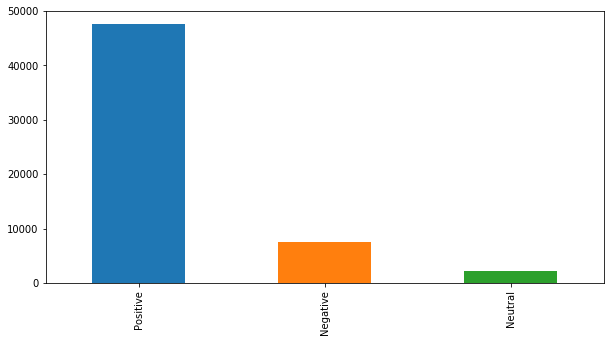

In [69]:
graph = df_en['article_rating'].value_counts()
plt.figure(figsize = (10,5))
graph.plot.bar()

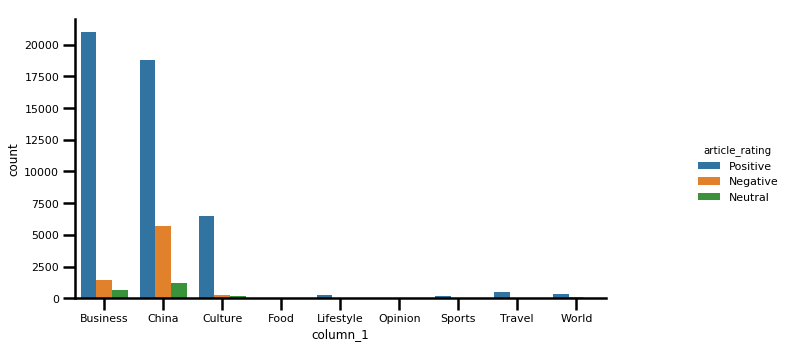

In [83]:
#using sns on different category and the sentiment of the article
sns.set_context('poster',font_scale=0.5)

g = sns.catplot("column_1",data=df_en,hue="article_rating",kind="count")
g.fig.set_size_inches(12,5)